In [1]:
import json
import urllib
import pandas as pd
import seaborn as sns
import warnings
import pandas_profiling
import matplotlib.pyplot as plt
from kafka import KafkaProducer
from pykafka import KafkaClient

plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

C:\Users\Saumyaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
url = "https://api.covid19india.org/data.json"

response = urllib.request.urlopen(url)

data = json.loads(response.read())

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

In [33]:
df.head()

,cases_time_series,statewise,tested
0,"{'dailyconfirmed': '1', 'dailydeceased': '0', 'dailyrecovered': '0', 'date': '30 January ', 'totalconfirmed': '1', 'totaldeceased': '0', 'totalrecovered': '0'}","{'active': '177988', 'confirmed': '440183', 'deaths': '14015', 'deltaconfirmed': '13281', 'deltadeaths': '312', 'deltarecovered': '10875', 'lastupdatedtime': '22/06/2020 23:31:42', 'migratedother': '51', 'recovered': '248129', 'state': 'Total', 'statecode': 'TT', 'statenotes': ''}","{'individualstestedperconfirmedcase': '75.64', 'positivecasesfromsamplesreported': '', 'samplereportedtoday': '', 'source': 'Press_Release_ICMR_13March2020.pdf', 'source1': '', 'testpositivityrate': '1.20%', 'testsconductedbyprivatelabs': '', 'testsperconfirmedcase': '83.33', 'testspermillion': '5', 'totalindividualstested': '5900', 'totalpositivecases': '78', 'totalsamplestested': '6500', 'updatetimestamp': '13/03/2020 00:00:00'}"
1,"{'dailyconfirmed': '0', 'dailydeceased': '0', 'dailyrecovered': '0', 'date': '31 January ', 'totalconfirmed': '1', 'totaldeceased': '0', 'totalrecovered': '0'}","{'active': '61793', 'confirmed': '135796', 'deaths': '6283', 'deltaconfirmed': '3721', 'deltadeaths': '113', 'deltarecovered': '1962', 'lastupdatedtime': '22/06/2020 23:26:52', 'migratedother': '14', 'recovered': '67706', 'state': 'Maharashtra', 'statecode': 'MH', 'statenotes': '14 cases were marked as non-covid deaths in MH bulletin. These have been reduced from deceased and active counts [June 16] : 1328 deceased cases have been retroactively added to MH bulletin. [June 20]: 69 deceased cases have been reduced based on state bulletin. '}","{'individualstestedperconfirmedcase': '81.57', 'positivecasesfromsamplesreported': '', 'samplereportedtoday': '', 'source': 'ICMR_website_update_18March_6PM_IST.pdf', 'source1': '', 'testpositivityrate': '1.14%', 'testsconductedbyprivatelabs': '', 'testsperconfirmedcase': '87.50', 'testspermillion': '10', 'totalindividualstested': '12235', 'totalpositivecases': '150', 'totalsamplestested': '13125', 'updatetimestamp': '18/03/2020 18:00:00'}"
2,"{'dailyconfirmed': '0', 'dailydeceased': '0', 'dailyrecovered': '0', 'date': '01 February ', 'totalconfirmed': '1', 'totaldeceased': '0', 'totalrecovered': '0'}","{'active': '27181', 'confirmed': '62087', 'deaths': '794', 'deltaconfirmed': '2710', 'deltadeaths': '37', 'deltarecovered': '1358', 'lastupdatedtime': '22/06/2020 20:05:18', 'migratedother': '0', 'recovered': '34112', 'state': 'Tamil Nadu', 'statecode': 'TN', 'statenotes': '2 deaths cross notified to other states from Chennai and Coimbatore. 1 patient died after turning negative for infection in Chengalpattu. These cases have been added to TN deceased tally'}","{'individualstestedperconfirmedcase': '73.96', 'positivecasesfromsamplesreported': '', 'samplereportedtoday': '', 'source': 'ICMR_website_update_19March_10AM_IST_V2.pdf', 'source1': '', 'testpositivityrate': '1.26%', 'testsconductedbyprivatelabs': '', 'testsperconfirmedcase': '79.26', 'testspermillion': '10', 'totalindividualstested': '12426', 'totalpositivecases': '168', 'totalsamplestested': '13316', 'updatetimestamp': '19/03/2020 10:00:00'}"
3,"{'dailyconfirmed': '1', 'dailydeceased': '0', 'dailyrecovered': '0', 'date': '02 February ', 'totalconfirmed': '2', 'totaldeceased': '0', 'totalrecovered': '0'}","{'active': '23820', 'confirmed': '62655', 'deaths': '2233', 'deltaconfirmed': '2909', 'deltadeaths': '58', 'deltarecovered': '3589', 'lastupdatedtime': '22/06/2020 21:59:15', 'migratedother': '0', 'recovered': '36602', 'state': 'Delhi', 'statecode': 'DL', 'statenotes': 'Delhi bulletins in the morning, containing data of the previous day. We will add that data to the date on which the report is released, rather than the previous day. [June 16]: 344 deceased cases have been retroactively added to DL bulletin.'}","{'individualstestedperconfirmedcase': '72.99', 'positivecasesfromsamplesreported': '', 'samplereportedtoday': '', 'source': 'ICMR_website_update_19March_6PM_

In [57]:
dict_time_series = dict(df.cases_time_series)
df_time_series = pd.DataFrame(dict_time_series).transpose()

In [35]:
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dailyconfirmed  144 non-null    object
 1   dailydeceased   144 non-null    object
 2   dailyrecovered  144 non-null    object
 3   date            144 non-null    object
 4   totalconfirmed  144 non-null    object
 5   totaldeceased   144 non-null    object
 6   totalrecovered  144 non-null    object
dtypes: object(7)
memory usage: 9.0+ KB


In [58]:
df_time_series['dailyconfirmed'] = df_time_series['dailyconfirmed'].astype(float)
df_time_series['dailydeceased'] = df_time_series['dailydeceased'].astype(float)
df_time_series['dailyrecovered'] = df_time_series['dailyrecovered'].astype(float)
df_time_series['totalconfirmed'] = df_time_series['totalconfirmed'].astype(float)
df_time_series['totaldeceased'] = df_time_series['totaldeceased'].astype(float)
df_time_series['totalrecovered'] = df_time_series['totalrecovered'].astype(float)

In [37]:
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dailyconfirmed  144 non-null    float64
 1   dailydeceased   144 non-null    float64
 2   dailyrecovered  144 non-null    float64
 3   date            144 non-null    object 
 4   totalconfirmed  144 non-null    float64
 5   totaldeceased   144 non-null    float64
 6   totalrecovered  144 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.0+ KB


In [59]:
df_time_series['data_day'] = [x[:2:] for x in df_time_series['date']]

In [60]:
df_time_series['data_month'] = [x[3::] for x in df_time_series['date']]

In [61]:
df_time_series['data_year'] = '2020'

In [62]:
df_time_series['data_month'] = df_time_series['data_month'].str.replace('January ','01')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('February ','02')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('March ','03')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('April ','04')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('May ','05')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('June ','06')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('July ','07')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('August ','08')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('September ','09')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('October ','10')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('November ','11')
df_time_series['data_month'] = df_time_series['data_month'].str.replace('December ','12')

In [63]:
df_time_series['data_date'] = df_time_series['data_day'] + '/' + df_time_series['data_month'] + '/' + df_time_series['data_year']

In [64]:
df_time_series['data_date'] = pd.to_datetime(df_time_series['data_date'],format='%d/%m/%Y')

In [45]:
df_time_series['date']

0       30 January 
1       31 January 
2      01 February 
3      02 February 
4      03 February 
           ...     
139        17 June 
140        18 June 
141        19 June 
142        20 June 
143        21 June 
Name: date, Length: 144, dtype: object

In [65]:
df_time_series.drop(['data_day','data_month','data_year','date'],axis=1,inplace=True)

In [47]:
df_time_series.set_index('data_date',inplace=True)

In [71]:
myPytProducer = KafkaProducer(bootstrap_servers=['localhost:9092'],api_version=(0,10,1))
myPytProducer.send('CovidTimeSeries11',df_time_series.to_json().encode('utf-8'))

In [72]:
client = KafkaClient("localhost:9092")
topic = client.topics["CovidTimeSeries11"]
consumer = topic.get_simple_consumer(consumer_timeout_ms=1000)

In [73]:
for message in consumer:
    json_data = message.value

In [74]:
df_time_series_2 = pd.read_json(json_data)
df_time_series_2.head()

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered,data_date
0,1,0,0,1,0,0,1580342400000
1,0,0,0,1,0,0,1580428800000
2,0,0,0,1,0,0,1580515200000
3,1,0,0,2,0,0,1580601600000
4,1,0,0,3,0,0,1580688000000


In [75]:
df_time_series_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   dailyconfirmed  144 non-null    int64
 1   dailydeceased   144 non-null    int64
 2   dailyrecovered  144 non-null    int64
 3   totalconfirmed  144 non-null    int64
 4   totaldeceased   144 non-null    int64
 5   totalrecovered  144 non-null    int64
 6   data_date       144 non-null    int64
dtypes: int64(7)
memory usage: 9.0 KB


In [81]:
df_time_series_3 = df_time_series_2.copy()

In [90]:
from datetime import datetime

In [94]:
datetime.fromtimestamp(1580342400000/1000)

datetime.datetime(2020, 1, 30, 5, 30)

In [96]:
df_time_series_3['data_date'] = pd.to_datetime([datetime.fromtimestamp(x/1000) for x in df_time_series_3['data_date']],
                                               format='%d/%m/%Y')

In [98]:
df_time_series_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dailyconfirmed  144 non-null    int64         
 1   dailydeceased   144 non-null    int64         
 2   dailyrecovered  144 non-null    int64         
 3   totalconfirmed  144 non-null    int64         
 4   totaldeceased   144 non-null    int64         
 5   totalrecovered  144 non-null    int64         
 6   data_date       144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(6)
memory usage: 9.0 KB


In [100]:
df_time_series_3['dailyactive'] = df_time_series_3['dailyconfirmed'] - df_time_series_3['dailyrecovered']

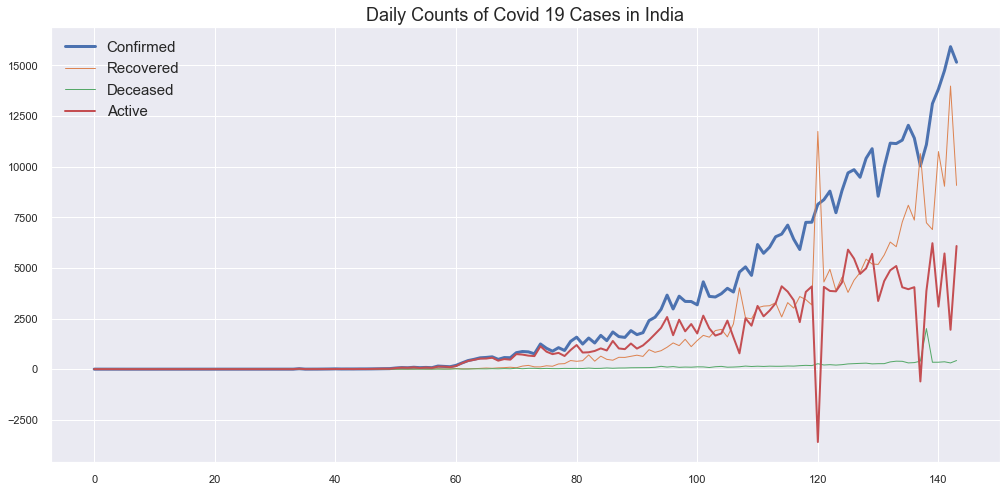

In [102]:
sns.set(rc={'figure.figsize':(17, 8)})
df_time_series_3['dailyconfirmed'].plot(linewidth=3.0)
df_time_series_3['dailyrecovered'].plot(linewidth=1.0)
df_time_series_3['dailydeceased'].plot(linewidth=1.0)
df_time_series_3['dailyactive'].plot(linewidth=2.0)
plt.legend(labels=['Confirmed','Recovered','Deceased','Active'],fontsize=15)
plt.title('Daily Counts of Covid 19 Cases in India',fontsize=18)
plt.show()

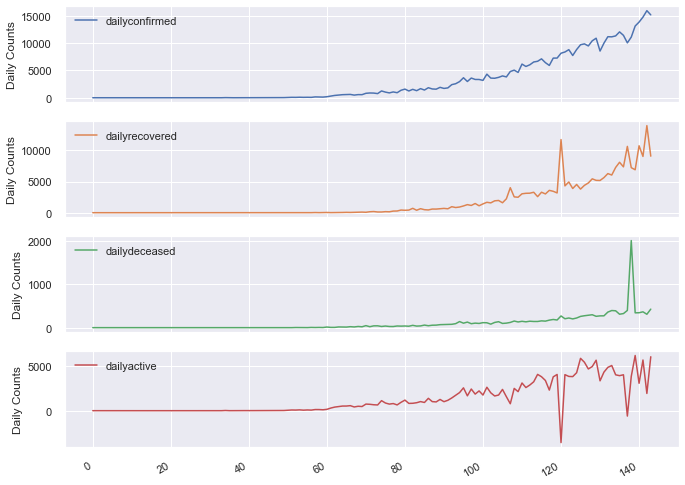

In [104]:
cols_plot = ['dailyconfirmed', 'dailyrecovered', 'dailydeceased','dailyactive']
axes = df_time_series_3[cols_plot].plot(kind='line', alpha=1.0, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Counts')
plt.savefig('time_series.png')